# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# !pip install "mlflow==2.10.2"
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
# # Download latest version
# path = kagglehub.dataset_download("blastchar/telco-customer-churn")

# print("Path to dataset files:", path)

In [2]:
# Path ke dataset. Tanda '..' berarti 'naik satu level folder'
# karena notebook kita ada di 'preprocessing' dan data ada di 'namadataset_raw'.
file_path = '../namadataset_raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Baca data menjadi DataFrame pandas
df = pd.read_csv(file_path)

In [3]:
#Data Understanding
print('-'*25)
print('5 data teratas')
print('-'*25)
display(df.head())

print()
print('-'*25)
print('Informasi data')
print('-'*25)
display(df.info())

print()
print('-'*25)
print('Statistik deskriptif data')
print('-'*25)
display(df.describe())

-------------------------
5 data teratas
-------------------------


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]


-------------------------
Informasi data
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          704

None


-------------------------
Statistik deskriptif data
-------------------------


SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

üí° **Tipe Data yang Perlu Diperbaiki**
Insight paling krusial ada di sini. Dari output df.info(), kita melihat:

- Kolom `TotalCharges` memiliki tipe data object (teks), padahal seharusnya numerik (angka) seperti `MonthlyCharges`.
- Ini terjadi karena kemungkinan ada nilai yang bukan angka di dalam kolom tersebut (contohnya, spasi " " untuk pelanggan yang baru bergabung dan belum punya tagihan).
- Ini **wajib diperbaiki** pada tahap data cleaning sebelum kita bisa melakukan pemodelan.

üìä **Komposisi dan Statistik Data**
- **Komposisi**: Dataset ini terdiri dari **7043 baris (pelanggan)** dan **21 kolom (fitur)**. Mayoritas (18 kolom) adalah data kategorikal (object), yang berarti proses encoding (mengubah teks menjadi angka) akan menjadi bagian penting dari preprocessing.
- **Masa Berlangganan (tenure)**: Pelanggan berlangganan antara 0 hingga 72 bulan, dengan rata-rata sekitar 32 bulan. Ini menunjukkan variasi loyalitas pelanggan yang luas.
- **Senior Citizen**: Hanya sekitar 16% dari pelanggan yang merupakan warga senior (mean dari SeniorCitizen adalah 0.162).

üéØ **Fitur dan Target**
- **Fitur Tidak Relevan**: Kolom customerID adalah unik untuk setiap pelanggan dan tidak memiliki nilai prediktif. Kolom ini harus dibuang saat preprocessing.
- **Target Variable**: Kolom `Churn` adalah target yang ingin kita prediksi. Saat ini tipenya object ("Yes"/"No"), yang nantinya perlu kita ubah menjadi angka (misalnya, 1 untuk "Yes" dan 0 untuk "No").

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Mengubah TotalCharges menjadi numerik, error diubah jadi NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Cek kembali informasi data untuk melihat perubahan
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [5]:
# Menghitung jumlah nilai kosong di setiap kolom

print('-'*25)
print('Banyaknya nilai null')
print('-'*25)
df.isnull().sum()

-------------------------
Banyaknya nilai null
-------------------------


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
# Menghapus baris dimana ada nilai NaN
df.dropna(inplace=True)

# Cek ulang untuk memastikan sudah tidak ada nilai kosong
print('-'*25)
print('Banyaknya nilai null setelah drop null value')
print('-'*25)
df.isnull().sum()

-------------------------
Banyaknya nilai null setelah drop null value
-------------------------


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**4.2 Visualisasi Data** \
Sekarang data kita sudah bersih, mari kita buat beberapa visualisasi untuk mendapatkan insight.

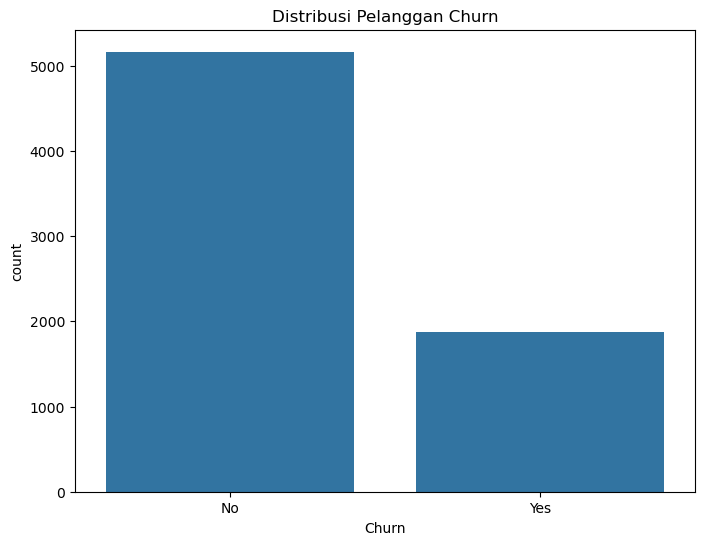

In [7]:
#Melihat Distribusi Target (Churn)

plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Pelanggan Churn')
plt.show()

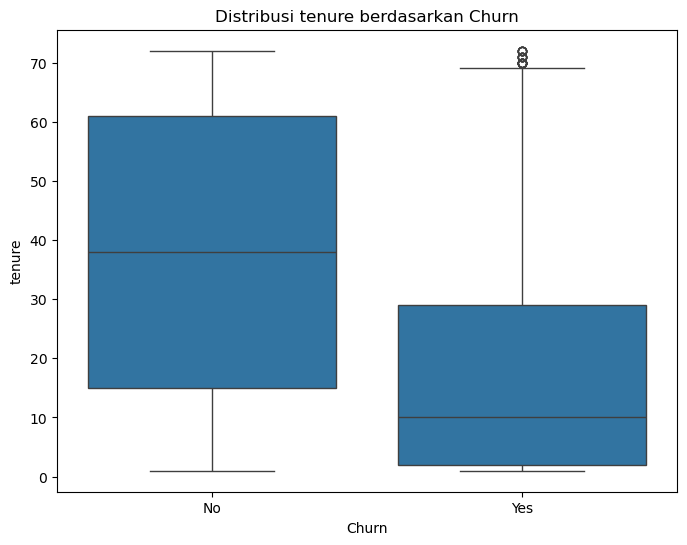

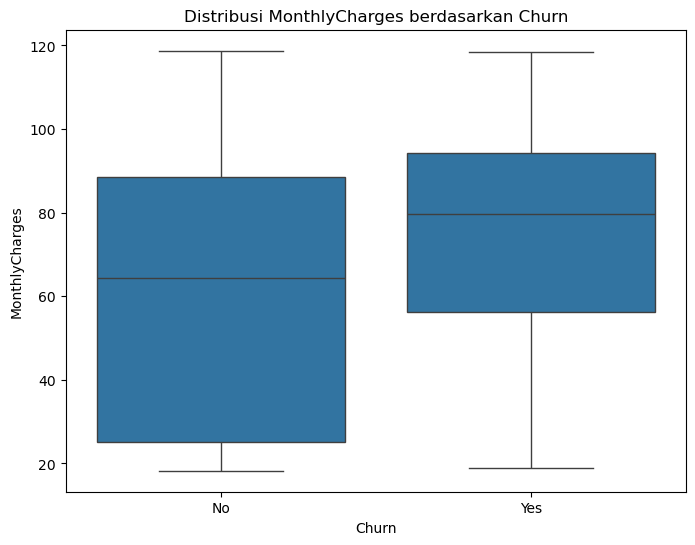

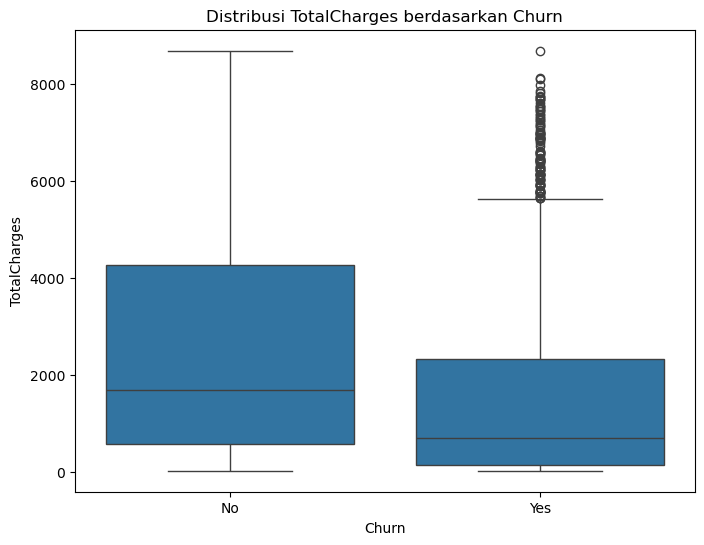

In [8]:
# Kolom numerik yang ingin kita analisis
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Membuat box plot untuk setiap fitur numerik
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Distribusi {feature} berdasarkan Churn')
    plt.show()

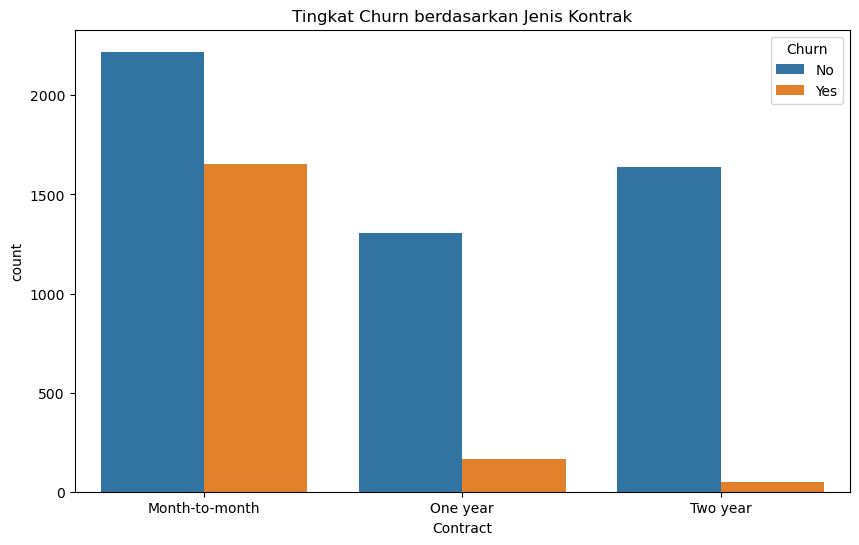

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Tingkat Churn berdasarkan Jenis Kontrak')
plt.show()

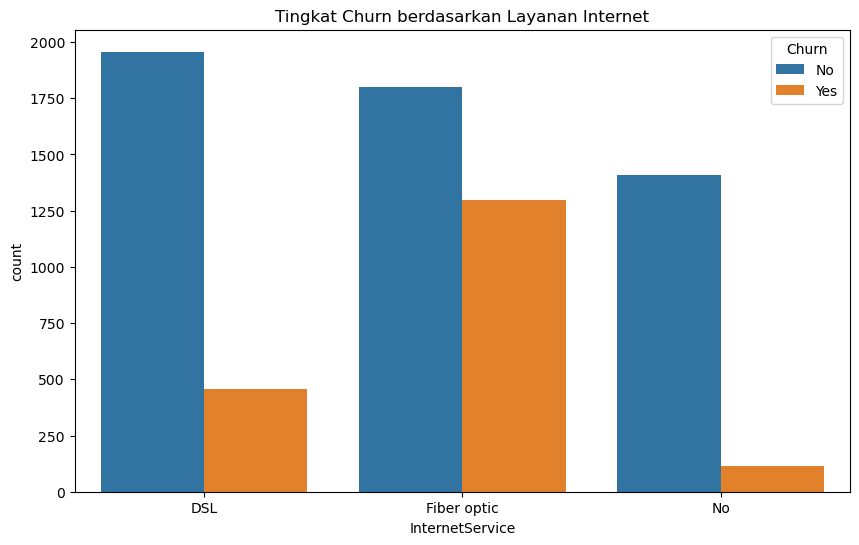

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Tingkat Churn berdasarkan Layanan Internet')
plt.show()

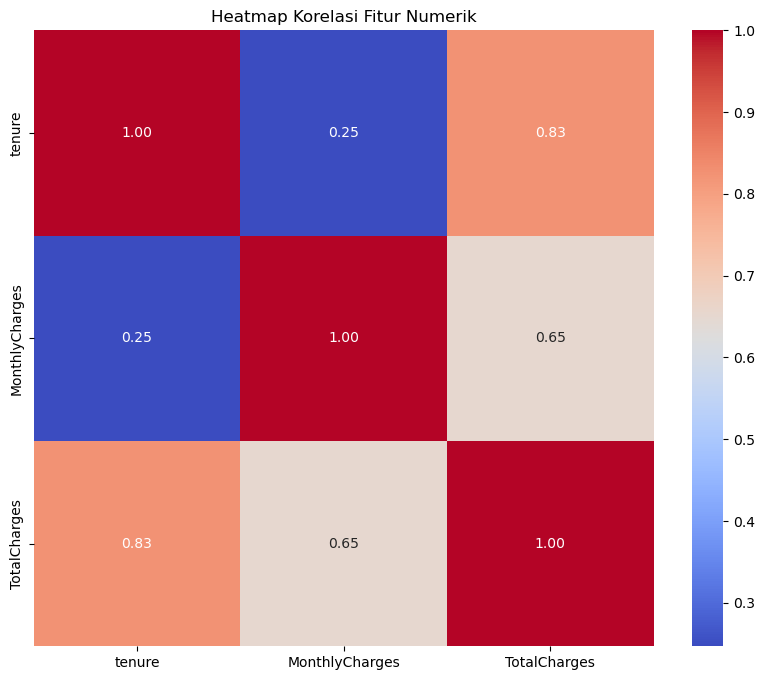

In [11]:
# Menghitung korelasi hanya untuk kolom numerik
correlation_matrix = df[numerical_features].corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

üéØ **Profil Pelanggan yang Churn**
Dari visualisasi, kita dapat membangun profil yang jelas mengenai pelanggan yang cenderung untuk churn:
- **Masa Berlangganan Singkat**: Pelanggan yang *churn* memiliki tenure (masa berlangganan) yang jauh lebih rendah dibandingkan pelanggan setia.
- **Tagihan Bulanan Tinggi**: Mereka cenderung memiliki `MonthlyCharges` (tagihan bulanan) yang lebih tinggi.
- **Total Tagihan Rendah**: Secara logis karena masa berlangganan yang singkat, `TotalCharges` mereka secara akumulatif lebih rendah.

üîë **Faktor Paling Berpengaruh**
Beberapa fitur kategorikal menunjukkan pengaruh yang sangat kuat terhadap keputusan churn:
- **Kontrak Month-to-month**: Ini adalah prediktor churn terkuat. Pelanggan dengan kontrak bulanan jauh lebih mungkin untuk berhenti dibandingkan mereka yang terikat kontrak satu atau dua tahun.
- **Layanan Internet Fiber Optic**: Pelanggan yang menggunakan layanan Fiber optic menunjukkan tingkat churn yang lebih tinggi dibandingkan pengguna DSL. Ini mungkin berkaitan dengan MonthlyCharges yang lebih tinggi.

‚ö†Ô∏è **Distribusi Kelas Target (Churn)**
- **Dataset Tidak Seimbang (Imbalanced)**: Jumlah pelanggan yang tidak churn ("No") jauh lebih banyak daripada pelanggan yang churn ("Yes"). Hal ini penting untuk diperhatikan saat tahap pemodelan, karena model bisa menjadi bias terhadap prediksi "No".

üîó **Hubungan Antar Fitur**
- **Korelasi Kuat**: Heatmap menunjukkan adanya korelasi positif yang kuat (0.83) antara `tenure` dan `TotalCharges`. Ini sangat wajar dan dapat dipahami. Hubungan ini tidak menjadi masalah untuk sebagian besar model, tetapi baik untuk diketahui.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

**5.1 Menangani Kolom Kategorikal** \
Model machine learning hanya bisa memproses angka, jadi kita perlu mengubah semua kolom kategorikal. Cara termudah dan paling umum adalah dengan One-Hot Encoding.

Pertama, kita akan pisahkan kolom target (`Churn`) dan mengubahnya secara manual, lalu kita akan membuang `customerID`.

In [12]:
# Mengubah kolom target 'Churn' menjadi 0 dan 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Menghapus kolom customerID yang tidak relevan
df.drop('customerID', axis=1, inplace=True)

# Menghapus baris duplikat dari DataFrame
df.drop_duplicates(inplace=True)

# Memastikan kembali sudah tidak ada data duplikat
print(f"Jumlah data duplikat setelah dihapus: {df.duplicated().sum()}")

# Melakukan One-Hot Encoding untuk semua kolom kategorikal lainnya
df_processed = pd.get_dummies(df, drop_first=True)

# Tampilkan beberapa baris pertama dari data yang sudah di-encode
df_processed.head()

Jumlah data duplikat setelah dihapus: 0


SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...                            False   
2                           False  ...                            False   
3                            True  ...                            False   
4                           False  ...                            False   

   StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  \
0            False                                False                False   
1            False                                False                False   
2            False                                False                False   
3            False                                False                False   
4            False                                False                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0              False              False                  True   
1               True              False                 False   
2              False              False                  True   
3               True              False                 False   
4              False              False                  True   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 31 columns]

**5.2 Memisahkan Fitur dan Target & Melakukan Scaling** \
Sekarang kita akan memisahkan data kita menjadi `X` (fitur/kolom-kolom prediktor) dan `y` (target/kolom Churn). Setelah itu, kita akan melakukan penskalaan pada fitur `X` agar semua nilainya berada dalam rentang yang sama.

In [13]:
# Memisahkan fitur (X) dan target (y)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Lakukan scaling pada fitur X
X_scaled = scaler.fit_transform(X)

Variabel X_scaled kini berisi semua data fitur Anda yang sudah bersih dan siap untuk dilatih.

**5.3 Membagi Data menjadi Training dan Testing** \
Langkah terakhir dalam preprocessing adalah membagi data menjadi set data latih (training set) dan set data uji (testing set).

In [14]:
# Membagi data dengan perbandingan 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

`stratify=y` adalah parameter penting untuk memastikan proporsi pelanggan yang churn dan tidak churn sama di training set dan testing set, mengingat data kita tidak seimbang.

Dengan ini, tahap eksperimen dan preprocessing telah selesai. Sekarang terdapat data `X_train`, `X_test`, `y_train`, dan `y_test` yang siap untuk digunakan di tahap pemodelan.